In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from matplotlib import rc
from numpy import inf
import os

from os import listdir


import uproot3
#import uproot


rc('text', usetex=True)

import matplotlib as mpl

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from matplotlib import rc
from matplotlib import gridspec
from matplotlib.font_manager import FontProperties

from numpy import inf

import os

rc('text', usetex=True)

import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=True)
#rc('font', size=22)
#rc('xtick', labelsize=15)
#rc('ytick', labelsize=15)
rc('legend', fontsize=15)
rc('xtick', labelsize=10)
rc('ytick', labelsize=10)
rc('font', size=10)


#
mpl.rcParams.update({'font.size': 19})
#mpl.rcParams.update({'legend.fontsize': 18})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
mpl.rcParams.update({'axes.labelsize': 18}) 
mpl.rcParams.update({'legend.frameon': False}) 

import matplotlib.pyplot as plt
import mplhep as hep
#hep.set_style(hep.style.CMS)
#hep.set_style("CMS")
hep.style.use("CMS")




/Users/owen/.pyenv/versions/3.8.1/lib/python3.8/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
save_plots = True



#infile_name_fullsim = 'h1-fullsim-2021-07-19/h1fullsim-5files.root'
infile_name_fullsim = '/Volumes/Ext_2020_08/dis-reco-work/h1-fullsim-2021-07-19/21-07-16-00-44-july15/out_ep0607/all-rapgap.root'

#infile_name_fastsim = 'mini-tree-no-noise.root'
#infile_name_fastsim = 'mini-tree-2021-10-04-no-noise.root'
#infile_name_fastsim = 'mini-tree-2021-10-04-no-noise-etamax2.7.root'
infile_name_fastsim = '/Volumes/Ext_2020_08/dis-reco-work/work-2021-10-04/h1-hera/mini-tree-no-noise.root'

#infile_name_fastsim_noise = 'mini-tree-noise-lm-0.0-ls-0.1-p1.0.root'
#infile_name_fastsim_noise = 'mini-tree-2021-10-04-with-noise.root'
#infile_name_fastsim_noise = 'mini-tree-2021-10-04-with-noise-etamax2.7.root'
infile_name_fastsim_noise = '/Volumes/Ext_2020_08/dis-reco-work/work-2021-10-04/h1-hera/mini-tree-with-noise.root'


ur_file_fullsim       = uproot3.open(infile_name_fullsim)

ur_file_fastsim       = uproot3.open(infile_name_fastsim)

ur_file_fastsim_noise = uproot3.open(infile_name_fastsim_noise)


max_events = 1e7

print (ur_file_fullsim.keys())
print (ur_file_fullsim['Rapgap'].keys())
ur_tree_fullsim = ur_file_fullsim['Rapgap']['minitree']
print(ur_tree_fullsim)
mc_fullsim = ur_tree_fullsim.pandas.df(['*'], entrystop=max_events, flatten=True)

max_events = 1e6

print (ur_file_fastsim.keys()) 
ur_tree_fastsim = ur_file_fastsim['minitree']
print(ur_tree_fastsim)
mc_fastsim   =  ur_tree_fastsim.pandas.df(['*'], entrystop=max_events, flatten=True)


print (ur_file_fastsim_noise.keys()) 
ur_tree_fastsim_noise = ur_file_fastsim_noise['minitree']
print(ur_tree_fastsim_noise)
mc_fastsim_noise   =  ur_tree_fastsim_noise.pandas.df(['*'], entrystop=max_events, flatten=True)


#-- fix gen_x in fullsim
mc_fullsim.eval('s = 4*27.6*920', inplace=True)
mc_fullsim.eval('gen_x = gen_Q2/(s*gen_y)', inplace=True)

mc_fullsim = mc_fullsim.query('gen_Q2>200')
mc_fullsim = mc_fullsim.query('Q2_e>0')

mc_fullsim.eval('s = 4*27.6*920', inplace=True)
mc_fullsim.eval('x_e = Q2_e/(s*y_e)',inplace=True)
mc_fullsim.eval('x_da = Q2_da/(s*y_da)',inplace=True)
mc_fullsim.eval('x_sigma = Q2_sigma/(s*y_sigma)',inplace=True)
mc_fullsim.eval('x_esigma = x_sigma',inplace=True)
mc_fullsim.eval('x_h = Q2_h/(s*y_h)',inplace=True)

mc_fullsim.eval('xe_ratio = x_e/gen_x',inplace=True)
mc_fullsim.eval('xda_ratio = x_da/gen_x',inplace=True)
mc_fullsim.eval('xsigma_ratio = x_sigma/gen_x',inplace=True)
mc_fullsim.eval('xesigma_ratio = x_esigma/gen_x',inplace=True)
mc_fullsim.eval('xh_ratio = x_h/gen_x',inplace=True)





mc_fastsim.eval('xe_ratio = x_e/gen_x',inplace=True)
mc_fastsim.eval('xda_ratio = x_da/gen_x',inplace=True)
mc_fastsim.eval('xsigma_ratio = x_sigma/gen_x',inplace=True)
mc_fastsim.eval('xh_ratio = x_h/gen_x',inplace=True)

mc_fastsim.eval('e_e = sqrt(e_px*e_px + e_py*e_py + e_pz*e_pz)', inplace=True )
mc_fastsim.eval('Empz = HFS_E - HFS_pz + e_e - e_pz', inplace=True )

mc_fastsim_noise.eval('xe_ratio = x_e/gen_x',inplace=True)
mc_fastsim_noise.eval('xda_ratio = x_da/gen_x',inplace=True)
mc_fastsim_noise.eval('xsigma_ratio = x_sigma/gen_x',inplace=True)
mc_fastsim_noise.eval('xh_ratio = x_h/gen_x',inplace=True)

mc_fastsim_noise.eval('e_e = sqrt(e_px*e_px + e_py*e_py + e_pz*e_pz)', inplace=True )
mc_fastsim_noise.eval('Empz = HFS_E - HFS_pz + e_e - e_pz', inplace=True )

#-- remove tail of strange events in fastsim
mc_fastsim = mc_fastsim.query( 'HFS_pt > 2')

mc_fastsim_noise = mc_fastsim_noise.query( 'HFS_pt > 2')



[b'Rapgap;1']
[b'minitree;1', b'DISEvent;1']
<TTree b'minitree' at 0x000265a78340>
[b'minitree;7', b'minitree;6']
<TTree b'minitree' at 0x0002715f3fd0>
[b'minitree;7', b'minitree;6']
<TTree b'minitree' at 0x000265a4e280>


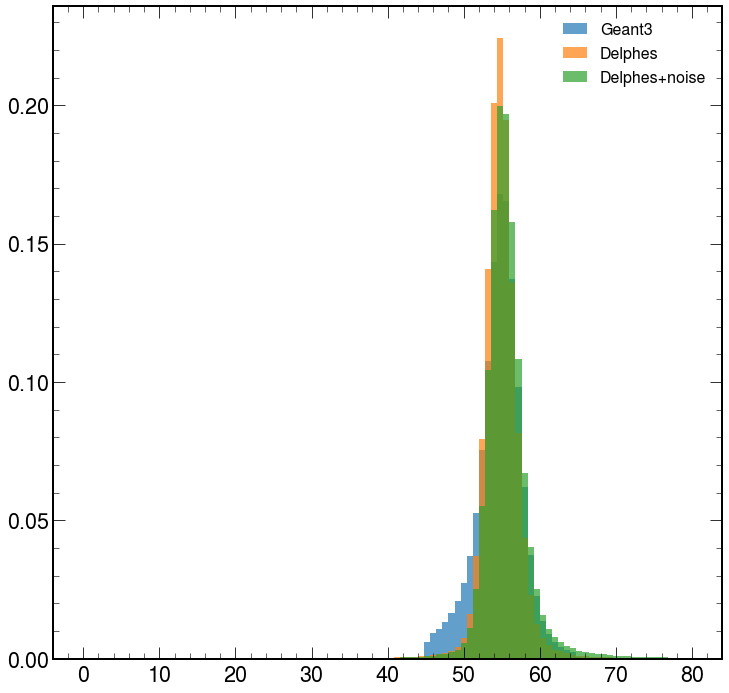

In [3]:
fig,ax = plt.subplots(1,1,figsize=(12,12))
ax.hist(mc_fullsim['Empz'], weights=mc_fullsim['wgt'], density=True, bins=100,range=(0,80), alpha=0.7, label='Geant3' )
ax.hist(mc_fastsim['Empz'],  density=True, bins=100,range=(0,80), alpha=0.7, label='Delphes' )
ax.hist(mc_fastsim_noise['Empz'],  density=True, bins=100,range=(0,80), alpha=0.7, label='Delphes+noise' )
ax.legend(loc='best',fontsize=16)
plt.show()

In [4]:
mc_fullsim = mc_fullsim.query( 'Empz > 45 and Empz < 65')
mc_fastsim = mc_fastsim.query( 'Empz > 45 and Empz < 65')
mc_fastsim_noise = mc_fastsim_noise.query( 'Empz > 45 and Empz < 65')

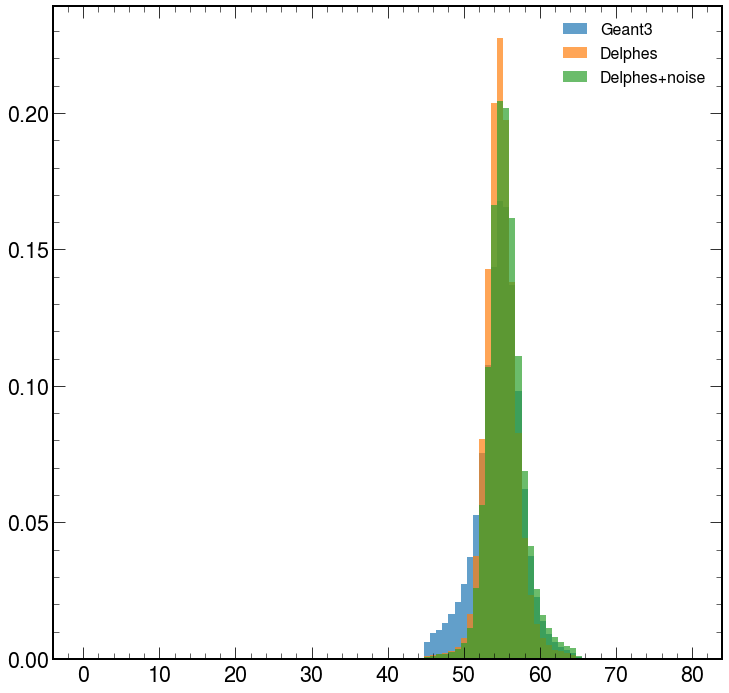

In [5]:
fig,ax = plt.subplots(1,1,figsize=(12,12))
ax.hist(mc_fullsim['Empz'], weights=mc_fullsim['wgt'], density=True, bins=100,range=(0,80), alpha=0.7, label='Geant3' )
ax.hist(mc_fastsim['Empz'],  density=True, bins=100,range=(0,80), alpha=0.7, label='Delphes' )
ax.hist(mc_fastsim_noise['Empz'],  density=True, bins=100,range=(0,80), alpha=0.7, label='Delphes+noise' )
ax.legend(loc='best',fontsize=16)
plt.show()

['gen_y>0.5 and gen_y<0.7' 'gen_y>0.2 and gen_y<0.5'
 'gen_y>0.1 and gen_y<0.2' 'gen_y>0.05 and gen_y<0.1'
 'gen_y>0.01 and gen_y<0.05']
gen_y>0.5 and gen_y<0.7
gen_y>0.2 and gen_y<0.5
gen_y>0.1 and gen_y<0.2
gen_y>0.05 and gen_y<0.1
gen_y>0.01 and gen_y<0.05
gen_y>0.5 and gen_y<0.7
gen_y>0.2 and gen_y<0.5
gen_y>0.1 and gen_y<0.2
gen_y>0.05 and gen_y<0.1
gen_y>0.01 and gen_y<0.05
gen_y>0.5 and gen_y<0.7
gen_y>0.2 and gen_y<0.5
gen_y>0.1 and gen_y<0.2
gen_y>0.05 and gen_y<0.1
gen_y>0.01 and gen_y<0.05


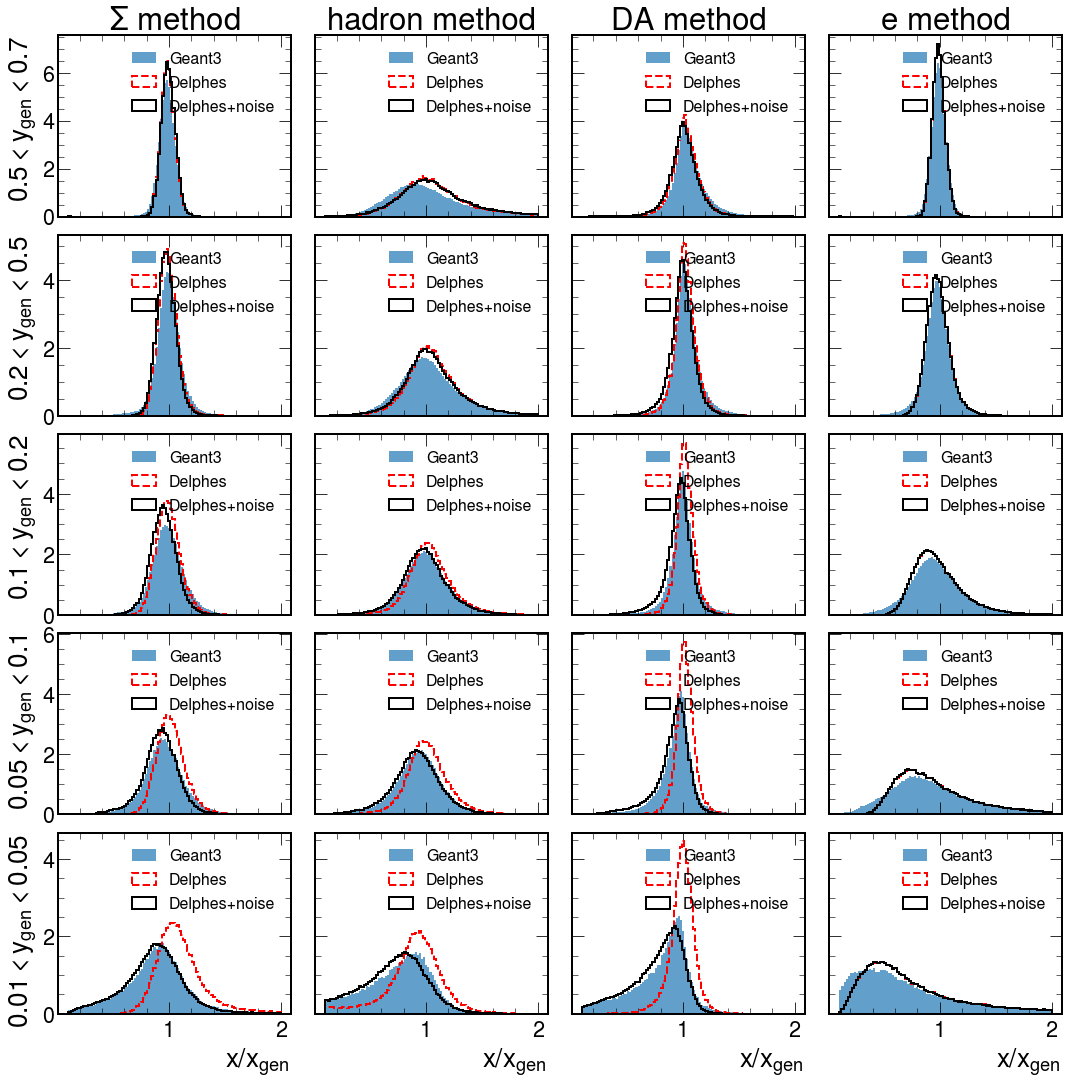

In [6]:
fig,ax = plt.subplots(5,4,figsize=(18,18),sharey='row',sharex=True)
ax = ax.flatten()
ybins = np.array(['gen_y>0.5 and gen_y<0.7', 'gen_y>0.2 and gen_y<0.5',
                  'gen_y>0.1 and gen_y<0.2', 'gen_y>0.05 and gen_y<0.1','gen_y>0.01 and gen_y<0.05'])
print(ybins)

myalpha=0.7

for i in range(5):
    print(ybins[i])
    temp = mc_fullsim.query(ybins[i])
    ax[3 + 4*i].hist(temp['xe_ratio'],weights=temp['wgt'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Geant3')
    ax[2 + 4*i].hist(temp['xda_ratio'],weights=temp['wgt'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Geant3')
    ax[1 + 4*i].hist(temp['xh_ratio'],weights=temp['wgt'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Geant3')
    ax[0 + 4*i].hist(temp['xsigma_ratio'],weights=temp['wgt'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Geant3')


    
myalpha=1.0

mylinestyle = 'dashed'
for i in range(5):
    print(ybins[i])
    temp = mc_fastsim.query(ybins[i])
    ax[3 + 4*i].hist(temp['xe_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Delphes',histtype='step',color='red',lw=2, ls=mylinestyle)
    ax[2 + 4*i].hist(temp['xda_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Delphes',histtype='step',color='red',lw=2, ls=mylinestyle)
    ax[1 + 4*i].hist(temp['xh_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Delphes',histtype='step',color='red',lw=2, ls=mylinestyle)
    ax[0 + 4*i].hist(temp['xsigma_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Delphes',histtype='step',color='red',lw=2, ls=mylinestyle)

mylinestyle = 'solid'
for i in range(5):
    print(ybins[i])
    temp = mc_fastsim_noise.query(ybins[i])
    ax[3 + 4*i].hist(temp['xe_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Delphes+noise',histtype='step',color='black',lw=2, ls=mylinestyle)
    ax[2 + 4*i].hist(temp['xda_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Delphes+noise',histtype='step',color='black',lw=2, ls=mylinestyle)
    ax[1 + 4*i].hist(temp['xh_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Delphes+noise',histtype='step',color='black',lw=2, ls=mylinestyle)
    ax[0 + 4*i].hist(temp['xsigma_ratio'],density=True,bins=100,range=(0.1,2),alpha=myalpha,label='Delphes+noise',histtype='step',color='black',lw=2, ls=mylinestyle)




    
plt.subplots_adjust(wspace=0.1, hspace=0.1)

ax[0].set_title('$\Sigma$ method')
ax[1].set_title('hadron method')
ax[2].set_title('DA method')
ax[3].set_title('e method')




ax[0].set_ylabel(' $0.5<y_{gen}<0.7$')
ax[4].set_ylabel(' $0.2<y_{gen}<0.5$')
ax[8].set_ylabel(' $0.1<y_{gen}<0.2$')
ax[12].set_ylabel(' $0.05<y_{gen}<0.1$')
ax[16].set_ylabel(' $0.01<y_{gen}<0.05$')
ax[-1].set_xlabel(r'$x/x_{gen}$ ')

ax[-2].set_xlabel(r'$x/x_{gen}$ ')
ax[-3].set_xlabel(r'$x/x_{gen}$ ')
ax[-4].set_xlabel(r'$x/x_{gen}$ ')

for i in range(len(ax.flatten())):
    ax[i].legend(loc='best',fontsize=16)    
plt.subplots_adjust(wspace=0.1, hspace=0.1)

#ax[0].text(4.75, 12.9,r"Comparison between $\bf{H1}$"+' full simulation (Django+G3) and Delphes ',
#                 horizontalalignment='center',multialignment='center',
#verticalalignment='center', fontsize=30)

#plt.savefig('plots/xres-no-noise.png',bbox_inches='tight')
plt.savefig('plots/xres-noise.png',bbox_inches='tight')
plt.savefig('plots/xres-noise.pdf',bbox_inches='tight')

plt.show()